In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
import seaborn as sns

In [2]:

features_names = ['VAR','RMS','IEMG','MAV',
                  'LOG','WL','ACC','DASDV','ZC','WAMP','MYOP','FR','MNP','TP','MNF','MDF','PKF','WENT']

dataset = pd.read_csv('joint_features/all.csv')

df = pd.DataFrame(dataset)
df = df.fillna(df.mean())
df = df.sample(frac=1)

X = df[features_names]
y = df['otot']

/tmp/ipykernel_48837/2810734894.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.mean())


In [7]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA


le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

pca = PCA(n_components=3)
scaler = StandardScaler()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# scaler = MinMaxScaler()
# scaler.fit(X_train)

# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

Text(0, 0.5, 'Second Principal Component')

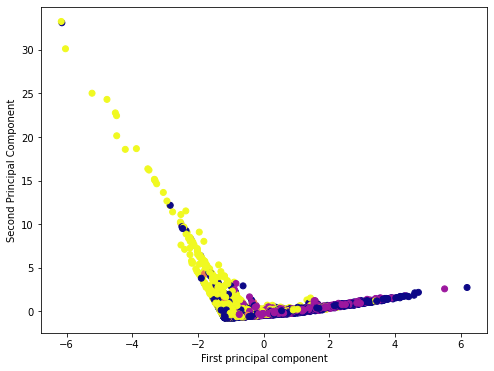

In [8]:
plt.figure(figsize=(8,6))
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm

# clf = MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter=100, random_state=1)
# clf = MultinomialNB()
clf = svm.SVC(
    kernel='rbf',
    C=1000,
    gamma=1
)
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)


# print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))